In [7]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


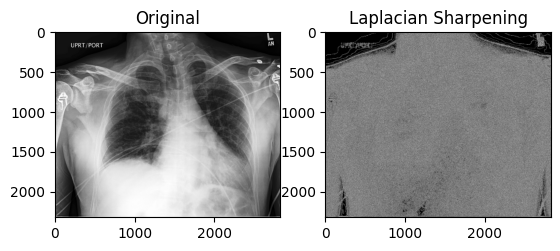

In [10]:
#Import the necessary libraries 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
  
# Load the image 
image = cv2.imread('view1_frontal.jpg') 
  
#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 
  
# Sharpen the image using the Laplacian operator 
sharpened_image2 = cv2.Laplacian(image, cv2.CV_64F) 
  
#Save the image 
cv2.imwrite('Laplacian sharpened_image.jpg', sharpened_image2) 
  
#Plot the sharpened image 
plt.subplot(1, 2, 2) 
plt.title("Laplacian Sharpening") 
plt.imshow(sharpened_image2) 
plt.show()

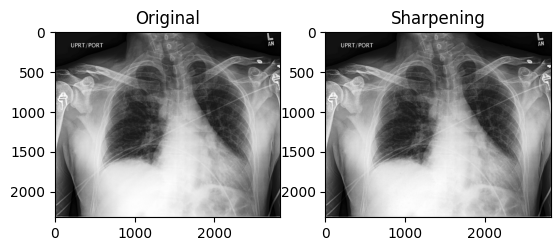

In [12]:
#Import the necessary libraries 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
  
# Load the image 
image = cv2.imread('view1_frontal.jpg') 
  
#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 
  
# Create the sharpening kernel 
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
  
# Sharpen the image 
sharpened_image = cv2.filter2D(image, -5, kernel) 
  
#Save the image 
cv2.imwrite('sharpened_image.jpg', sharpened_image) 
  
#Plot the sharpened image 
plt.subplot(1, 2, 2) 
plt.title("Sharpening") 
plt.imshow(sharpened_image) 
plt.show()

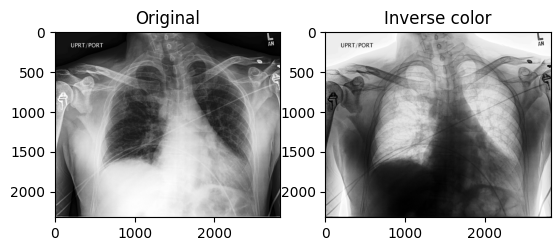

In [13]:

#Import the necessary libraries 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
  
# Load the image 
image = cv2.imread('view1_frontal.jpg') 
  
#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 
  
# Inverse by subtracting from 255 
inverse_image = 255 - image 
  
#Save the image 
cv2.imwrite('inverse_image.jpg', inverse_image) 
#Plot the Inverse image 
plt.subplot(1, 2, 2) 
plt.title("Inverse color") 
plt.imshow(inverse_image) 
plt.show()

In [16]:
import cv2
import numpy as np

def elastic_transform(image, alpha, sigma, random_state=None):
    """Apply elastic deformation to an image as described in [Simard2003]."""
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))

    distored_image = cv2.remap(image, indices[1], indices[0], cv2.INTER_LINEAR)
    return distored_image

from scipy.ndimage import gaussian_filter

# Example usage:
image = cv2.imread('view1_frontal.jpg', cv2.IMREAD_GRAYSCALE)  # Load an image
transformed_image = elastic_transform(image, alpha=991, sigma=8)  # Apply elastic deformation
#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 
plt.subplot(1, 2, 2) 
plt.title("Elastic") 
plt.imshow(transformed_image) 
plt.show()
cv2.imwrite('transformed_xray.jpg', transformed_image)  # Save the transformed image

SyntaxError: invalid syntax (3358827729.py, line 19)

In [17]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 5.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


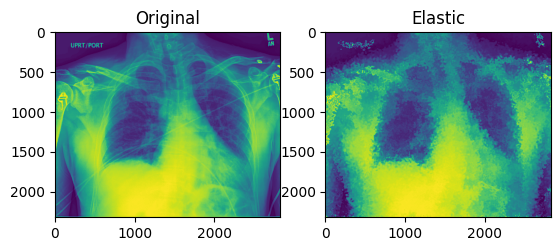

True

In [19]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]."""
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape

    # Random displacement fields
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    # Creating meshgrid
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))

    # Adding displacements to the grids
    map_x = (x + dx).astype(np.float32)
    map_y = (y + dy).astype(np.float32)

    # Remapping the original image
    distorted_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    return distorted_image
# Example usage:
image = cv2.imread('view1_frontal.jpg', cv2.IMREAD_GRAYSCALE)  # Load an image
transformed_image = elastic_transform(image, alpha=991, sigma=8)  # Apply elastic deformation
#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 
plt.subplot(1, 2, 2) 
plt.title("Elastic") 
plt.imshow(transformed_image) 
plt.show()
cv2.imwrite('transformed_xray.jpg', transformed_image)  # Save the transformed image

In [20]:
pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
